In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SALib.analyze import sobol, pawn

In [43]:
df_in = pd.read_csv('sensitivity_samples/sobol_params.csv')
X = df_in.to_numpy()

In [44]:
df_out = pd.read_csv('sensitivity_samples/sobol_output.csv')
Y = df_out.to_numpy()

In [45]:
seed = 1234

In [46]:
# Define parameters of interest
param_names = ['beta1', 'beta2', 'beta3', 'mu', 'omega', 'theta_0']
param_bounds = [[0.5,3], [-0.4, -0.9], [-0.2, -0.39], [0.25, 0.75], [0.5, 1.5], [0.5, 1.5]]
problem = {
    'num_vars': len(param_names),
    'names': param_names,
    'bounds': param_bounds
}

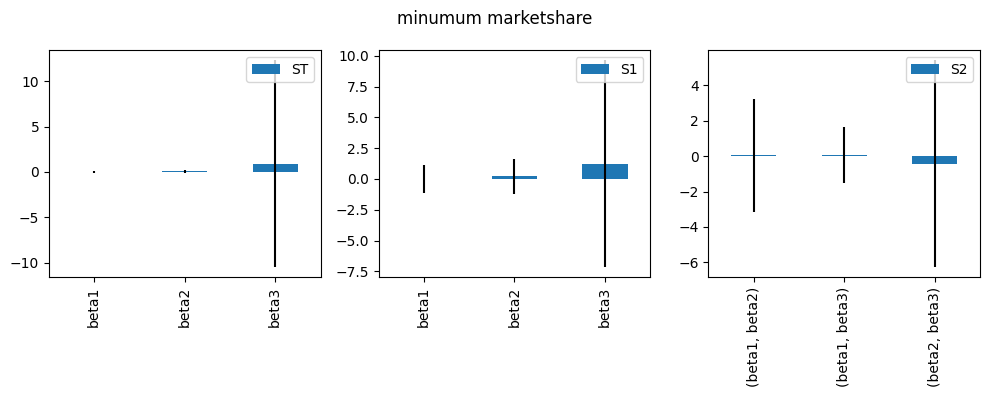

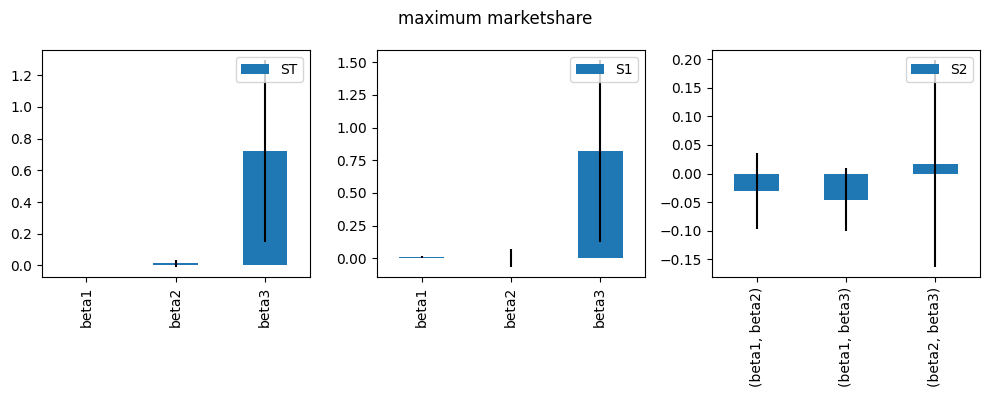

In [70]:
for i, name in zip(range(2), ['minimum', 'maximum']):

    Si_sobol = sobol.analyze(
                        problem, 
                        Y[:, i], 
                        calc_second_order=True, 
                        print_to_console=False, 
                        seed=1234
                    )
    
    axes = Si_sobol.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name} marketshare')
    plt.tight_layout()
    plt.show()

        minimum      mean    median   maximum        CV
beta1  0.234375  0.485938  0.500000  0.671875  0.280112
beta2  0.171875  0.385937  0.382812  0.578125  0.340201
beta3  0.437500  0.631250  0.601562  0.937500  0.221725


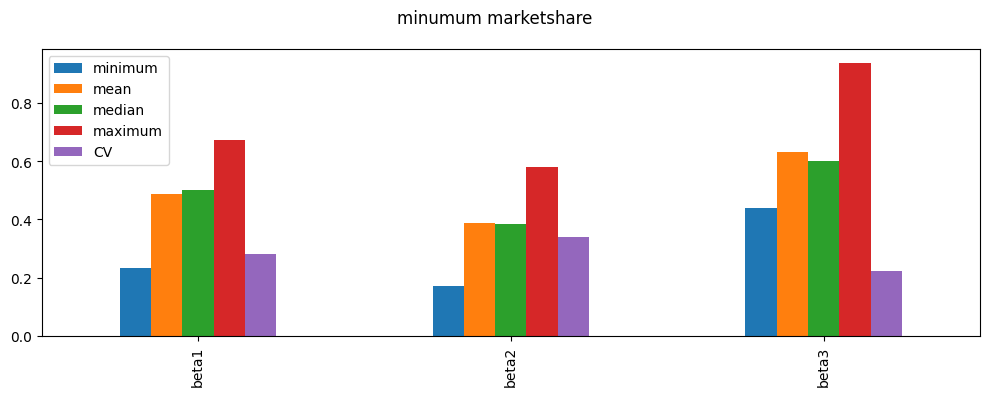

        minimum      mean    median   maximum        CV
beta1  0.343750  0.462500  0.429688  0.625000  0.210004
beta2  0.171875  0.360938  0.351562  0.578125  0.332207
beta3  0.500000  0.629687  0.625000  0.781250  0.149729


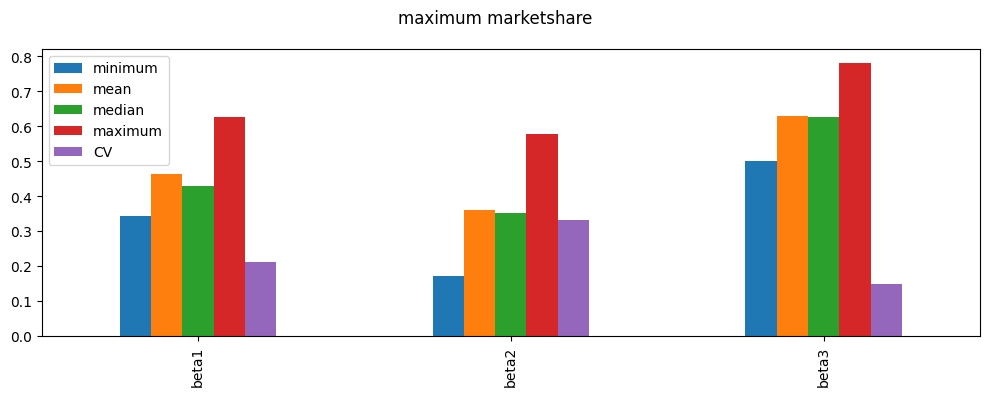

In [71]:
for i, name in zip(range(2), ['minumum', 'maximum']):

    Si_pawn = pawn.analyze(problem, X, Y[:,i], print_to_console=True)
    
    axes = Si_pawn.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name} marketshare')
    plt.tight_layout()
    plt.show()